# House Pricing 

Here we need to primarily determine the important variables contributing significantly to the housing prices.
We shall divide it into different sections

1. **Business/Technical Understanding**
2. **Data Understanding and Data Preparation**
3. **Data Modelling**
4. **Model Evaluation**

## 1. Business/Technical Understanding

### 1.1 Business Overview

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

### 1.2 Business Objective

Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
<br>
The company wants to know:
- **Which variables are significant in predicting the price of a house**
- **How well those variables describe the price of a house**

### 1.3 Technical Objective

The company is looking at prospective properties to buy to enter the market.Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.Also, determine the optimal value of lambda for ridge and lasso regression.

## 2. Data Understanding and Data Preparation

### 2.1 Importing and Understanding Data

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,scale
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE,RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Importing it into the dataframe
df = pd.read_csv("train.csv")
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
#Looking at all the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#Describing the data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Looking at the dataframe for datatypes and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
variables = {"numerical":["Id","LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2",
                          "BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF",
                          "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch",
                          "ScreenPorch","PoolArea","MiscVal","SalePrice"],
            "categorical":["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig",
                           "LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle",
                           "RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation",
                           "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC",
                           "CentralAir","Electrical","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
                           "KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","FireplaceQu","GarageType",
                           "GarageFinish","GarageCars","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature",
                           "SaleType","SaleCondition"],
            "date":["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]}
variable_numerical = pd.Series(variables["numerical"],name="Numerical Columns")
variable_categorical = pd.Series(variables["categorical"],name="Categorical Columns")
variable_date = pd.Series(variables["date"],name="Date Columns")
# Different Columns categorized into various categrories
# Here some numeric Datatypes such as GarageCars are considered as Categories can be considered as a category of 0 cars,
# 1 car or 2 cars and hence so
pd.concat([variable_numerical,variable_categorical,variable_date],axis=1)

,Numerical Columns,Categorical Columns,Date Columns
0,Id,MSSubClass,YearBuilt
1,LotFrontage,MSZoning,YearRemodAdd
2,LotArea,Street,GarageYrBlt
3,OverallQual,Alley,MoSold
4,OverallCond,LotShape,YrSold
5,MasVnrArea,LandContour,NaN
6,BsmtFinSF1,Utilities,NaN
7,BsmtFinSF2,LotConfig,NaN
8,BsmtUnfSF,LandSlope,NaN
9,TotalBsmtSF,Neighborhood,NaN


###  2.2 Data Exploration and Cleaning

Here we shall analyse individual columns and start cleaning the null values in the rows or columns. We shall follow the below process:
- Missing Values Removal
- Filling in Missing Values
- Dropping unwanted columns
- Data type Validation and Rectification
- Removing Outliers

In [7]:
# First lets check the null values in the data frame as percentage of total rows 
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
# The columns in which the values missing are :
missing_values_columns = ["LotFrontage","Alley","MasVnrType","MasVnrArea","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                          "BsmtFinType2","Electrical","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageQual"
                          "GarageCond","PoolQC","Fence","MiscFeature"]
len(missing_values_columns)

18

In [9]:
#Since its a numerical variable, we are replcaing it with median as any house should have some connect to a street
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
df["LotFrontage"].isnull().sum()

0

<AxesSubplot:ylabel='Alley'>

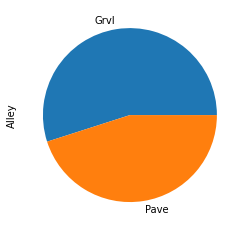

In [10]:
#Lets Check Alley
df["Alley"].value_counts().plot.pie()
# We can also decode from the data dictionary that no Alley is given as NA
# We can fill NA with No Alley

<AxesSubplot:ylabel='Alley'>

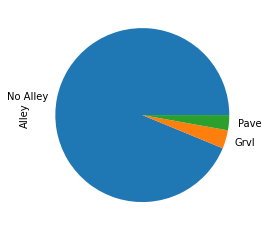

In [11]:
df["Alley"] = df["Alley"].fillna("No Alley")
df["Alley"].value_counts().plot.pie()

In [12]:
df["MasVnrType"] = df["MasVnrType"].fillna("None") # Can fill it with None as it
df["MasVnrArea"] = df["MasVnrArea"].fillna(0.0) # Can fill it with 0.0 as Type is mentioned as None
df[["MasVnrType","MasVnrArea"]].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64

In [13]:
# Lets analyse these columns now
basement_columns = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
print(df[basement_columns].isnull().sum())
#looking at it and lets take the BsmntQual value count
print(df["BsmtQual"].value_counts())
df[df["BsmtFinType2"].isnull()].head()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,No Alley,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


In [14]:
# From the data dictionary we know that we can convert these NA values to No Basement
for column in basement_columns:
    df[column] = df[column].fillna("No Basement")
df[basement_columns].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [15]:
# Lets analyse these columns : "Electrical"
print(df["Electrical"].value_counts())
df[df["Electrical"].isnull()]

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [16]:
#Initializing it with the maximum value
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])
print(df["Electrical"].isnull().sum())

0


In [17]:
df["FireplaceQu"].value_counts()
#Almost half of the values are not present
# From Data Dictionary it means that there is no fireplace so we can replace it with "No Fireplace"

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [18]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("No Fireplace")
print(df["FireplaceQu"].isnull().sum())

0


In [19]:
#Lets analyse the columns related to missing values in garage
garage_columns = ["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]
print(df["GarageType"].isnull().sum())
df[df["GarageType"].isnull()]

81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
99,100,20,RL,77.0,9320,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950
108,109,50,RM,85.0,8500,Pave,No Alley,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000
125,126,190,RM,60.0,6780,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
127,128,45,RM,55.0,4388,Pave,No Alley,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,87000
140,141,20,RL,70.0,10500,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gabl

In [20]:
for column in garage_columns:
    if column == "GarageYrBlt":
        df[column] = df[column].fillna(0)
    else:
        df[column] = df[column].fillna("No Garage")
print(df[column].isnull().sum())

0


In [21]:
print(df["PoolQC"].value_counts())
print(df["Fence"].value_counts())
print(df["MiscFeature"].value_counts())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


In [22]:
#df[["PoolQC","Fence","MiscFeature"]]
#Looking at the data Dictionary we know the NA values has significant meaning so lets replace it
replacer_value = {"PoolQC":"No Pool","Fence":"No Fence","MiscFeature":"None"}
for column in ["PoolQC","Fence","MiscFeature"]:
    df[column] = df[column].fillna(replacer_value[column])
print(df[["PoolQC","Fence","MiscFeature"]].isnull().sum())
print(df["PoolQC"].value_counts())
print(df["Fence"].value_counts())
print(df["MiscFeature"].value_counts())

PoolQC         0
Fence          0
MiscFeature    0
dtype: int64
No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64
None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64


In [23]:
# Describing all the columns with null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
# lets drop the id column as it does not signify anything to our business model
df1 = df.drop(axis=1,columns=["Id"])
variables["numerical"] = list(filter(lambda x:x!= "Id",variables["numerical"]))
variables["numerical"] 
#Lets change the data types of dates column to integer
df1["GarageYrBlt"] = df1["GarageYrBlt"].astype("int64")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### 2.3 Data Exploration

Here we attempt to find find relations among variables through visualization

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

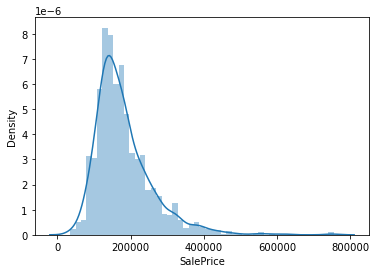

In [25]:
#Lets see first the ditribution plot of the target variable
sns.distplot(df1["SalePrice"])
#Price seems to be centered around 170,000

<AxesSubplot:xlabel='SalePrice'>

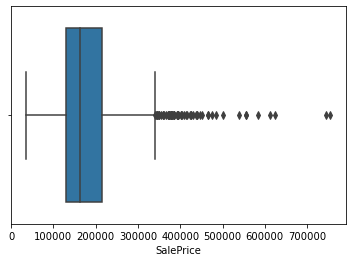

In [26]:
sns.boxplot(df1["SalePrice"])

(1460, 80)
(1350, 80)


<AxesSubplot:xlabel='SalePrice'>

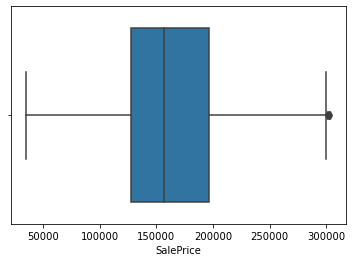

In [27]:
#We can see that their are outliers so we can remove this
print(df1.shape)
df1 = df1[df1["SalePrice"] < 305000]
print(df1.shape)
sns.boxplot(df1["SalePrice"])

<AxesSubplot:>

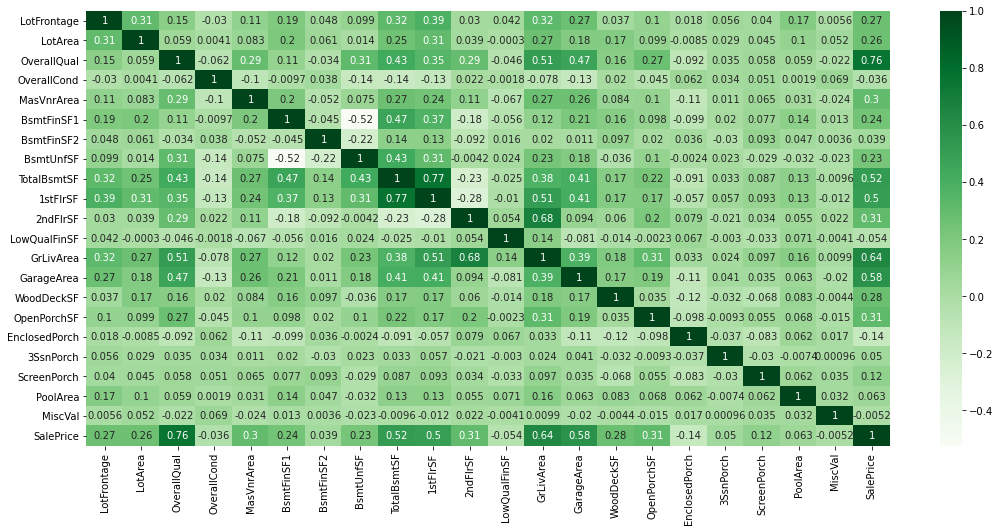

In [28]:
plt.figure(figsize=(18, 8))
sns.heatmap(df1[variables["numerical"]].corr(),cmap="Greens",annot=True)

Here we can see the SalePrice positively correlated highly with the variables
- LotFrontage
- LotArea
- OverallQual,
- MasVnrArea,
- BsmntFinSF1,
- TotalBsmntSF,
- 1stFirSF,
- 2ndFirSF,
- GrLivArea,
- GarageArea,
- WoodDeckSF,
- OpenPortchSF.
<br>
Lets also check how SalePrice changes with numerical variables using pairplot

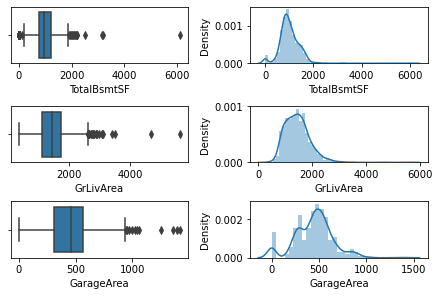

In [29]:
#Lets do outlier check for major variables such as TotalBsmtSF,GrLivArea,GarageArea
def continuous_data_frame(column,row,axes,dataframe_plot):
    sns.boxplot(dataframe_plot[column],ax=axes[row,0])
    sns.distplot(dataframe_plot[column],ax=axes[row,1])
    
fig, axes = plt.subplots(3, 2,constrained_layout = True)
k=0
for column in ["TotalBsmtSF","GrLivArea","GarageArea"]:
    continuous_data_frame(column,k,axes,df1)
    k=k+1

(1350, 80)
(1297, 80)


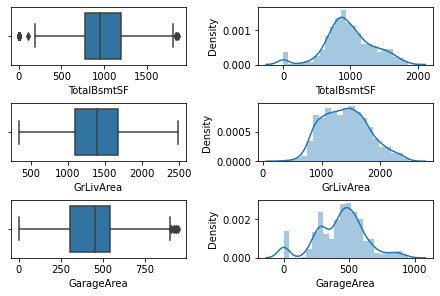

In [30]:
print(df1.shape)
df1 = df1[df1["TotalBsmtSF"] < 1900]
df1 = df1[df1["GrLivArea"] < 2500]
df1 = df1[df1["GarageArea"] < 950]
print(df1.shape)
fig, axes = plt.subplots(3, 2,constrained_layout = True)
k=0
for column in ["TotalBsmtSF","GrLivArea","GarageArea"]:
    continuous_data_frame(column,k,axes,df1)
    k=k+1

<Figure size 1440x864 with 0 Axes>

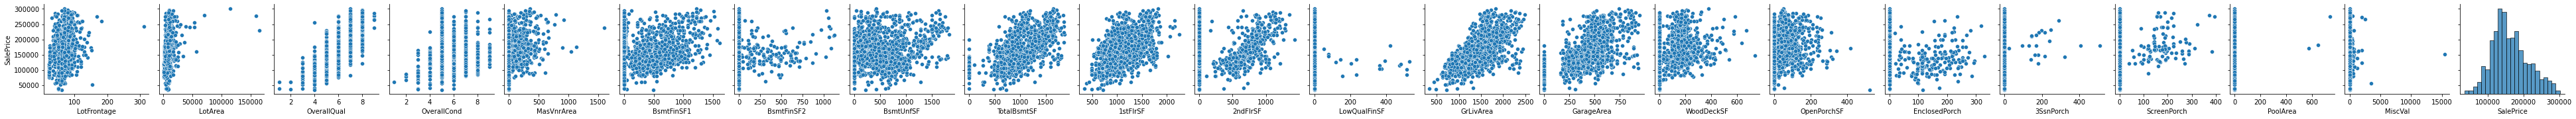

In [31]:
# From the above heatmap we can see the different correlations among the variabe
plt.figure(figsize=(20, 12))
sns.pairplot(data = df1[variables["numerical"]], x_vars=variables["numerical"],y_vars="SalePrice")
plt.show()

Here we can see LotFrontage,TotalBsmntSF,1stFirSF,GirLivArea,GarageArea seems to have a somewhat linear relationship with the sales price

In [32]:
print(len(variables["categorical"]))
print(variables["categorical"])

53
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [33]:
def plot_box_graphs(lower_index,upper_index):  
    plt.figure(figsize=(20, 12))
    k=1
    for i in range(lower_index,upper_index+1):
        plt.subplot(3,3,k)
        sns.boxplot(x = variables["categorical"][i], y = 'SalePrice', data = df1)
        k=k+1
    plt.show()

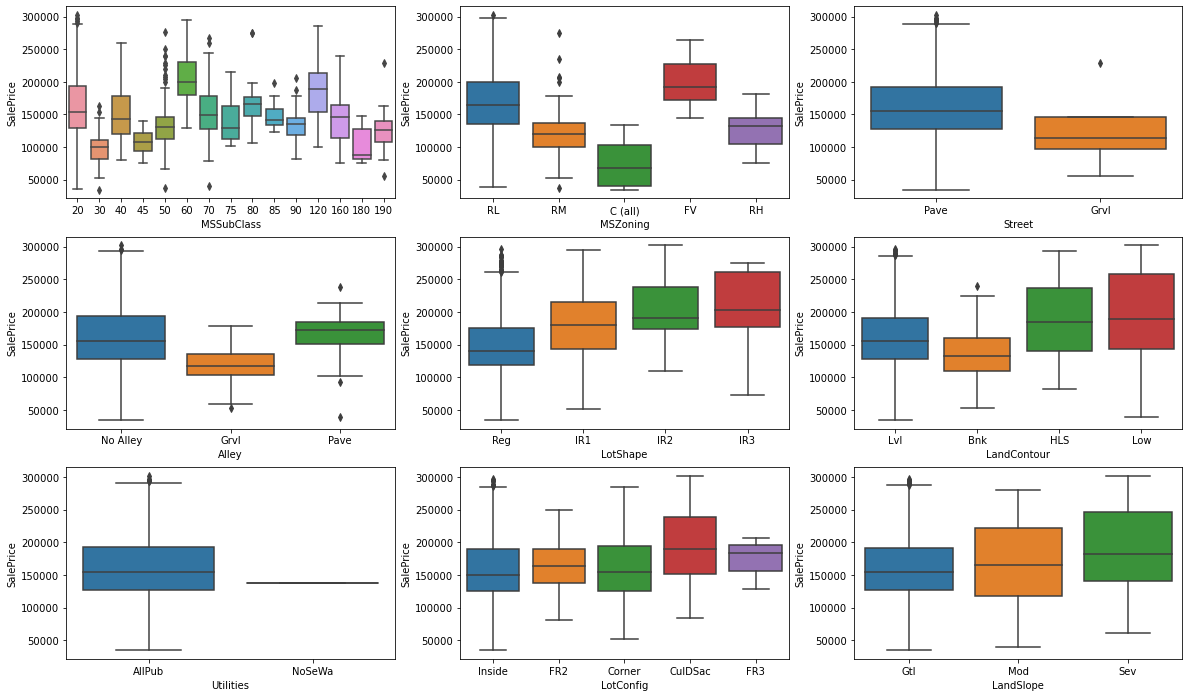

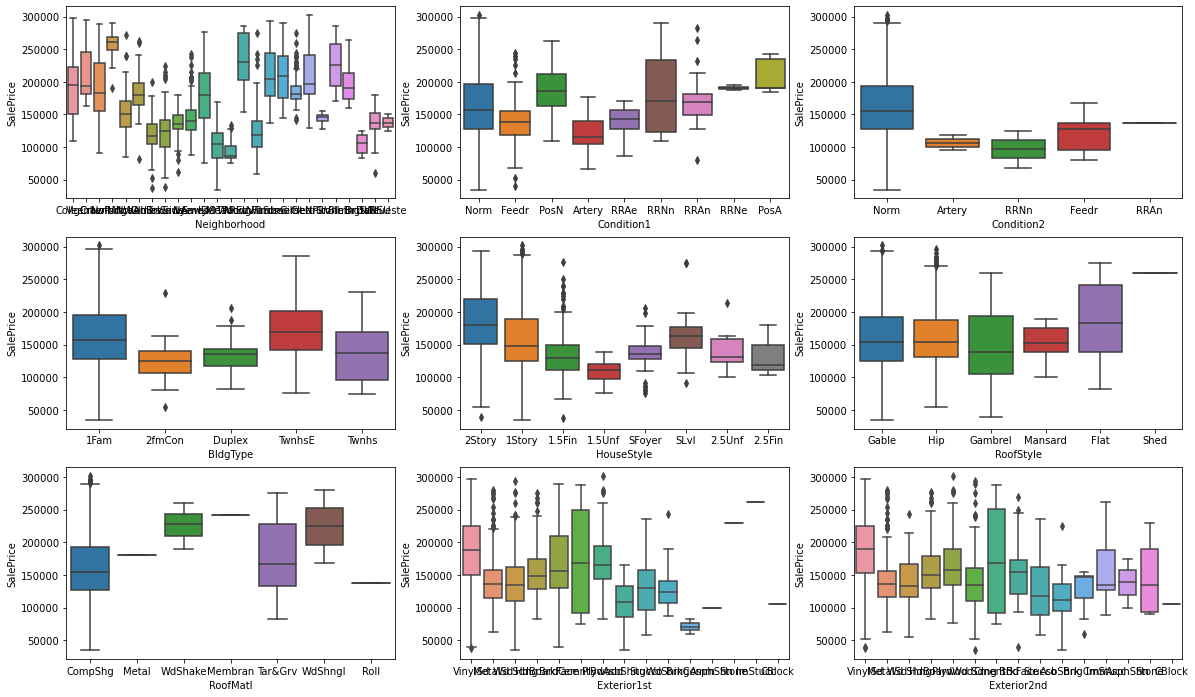

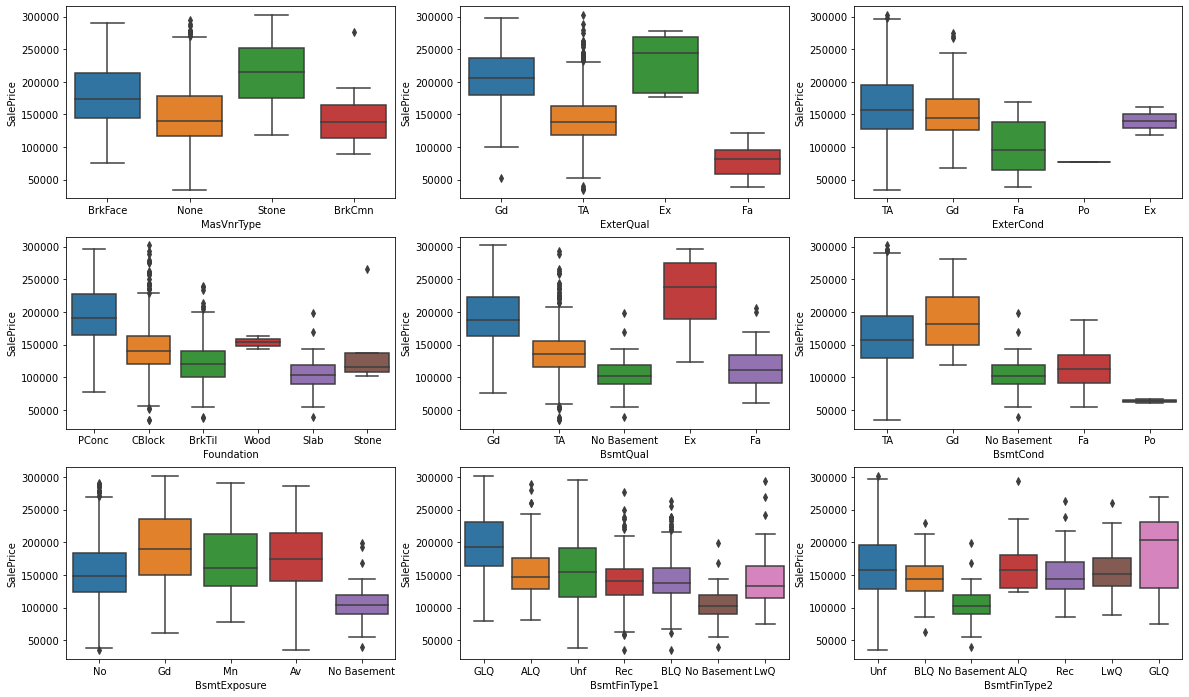

In [34]:
# Now lets see how it sees it with categorical variables
#53 0-52
#0-8,9-17,18-27,28-37,38-47,47-52
plot_box_graphs(0,8)
plot_box_graphs(9,17)
plot_box_graphs(18,26)

**Analysis of Categorical Columns on SalePrice**
<br>
Many variables do provide a indication of Sale Price but to narrow it down to the most significant variables
- Utilities - AllPub that is all facilities are generally preferred
- Neighborhood - Certain Neighborhoods fetch higher values 
- Condition2 - PosN	Near positive off-site feature--park, greenbelt, fetches higher prices
- RoofMatl - Roof Materials such as WdShngl i.e., Wood Shingles provide higher SalePrice
- MasVnrType - Masonry veneer type of Stone fetches higher price
- ExterQual - quality of the material on the exterior  matters a lot needs to be excellent to fetcher higher prices
- BsmntQual - Basement Quality which has excellent quality gives higher prices

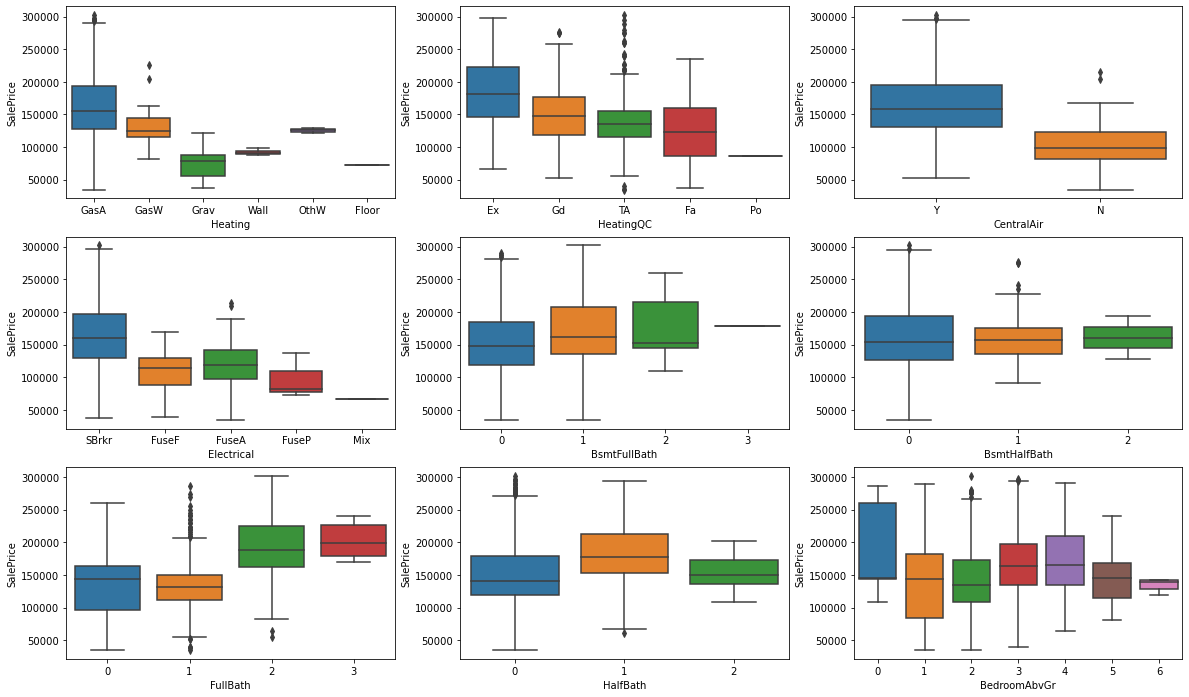

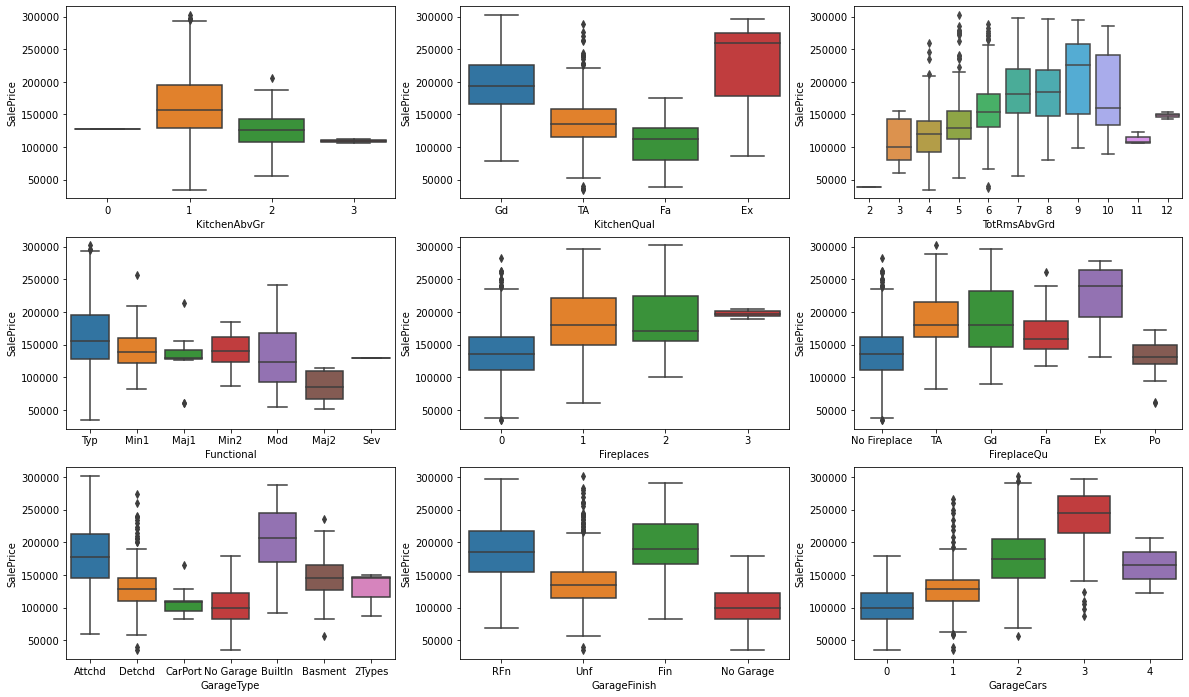

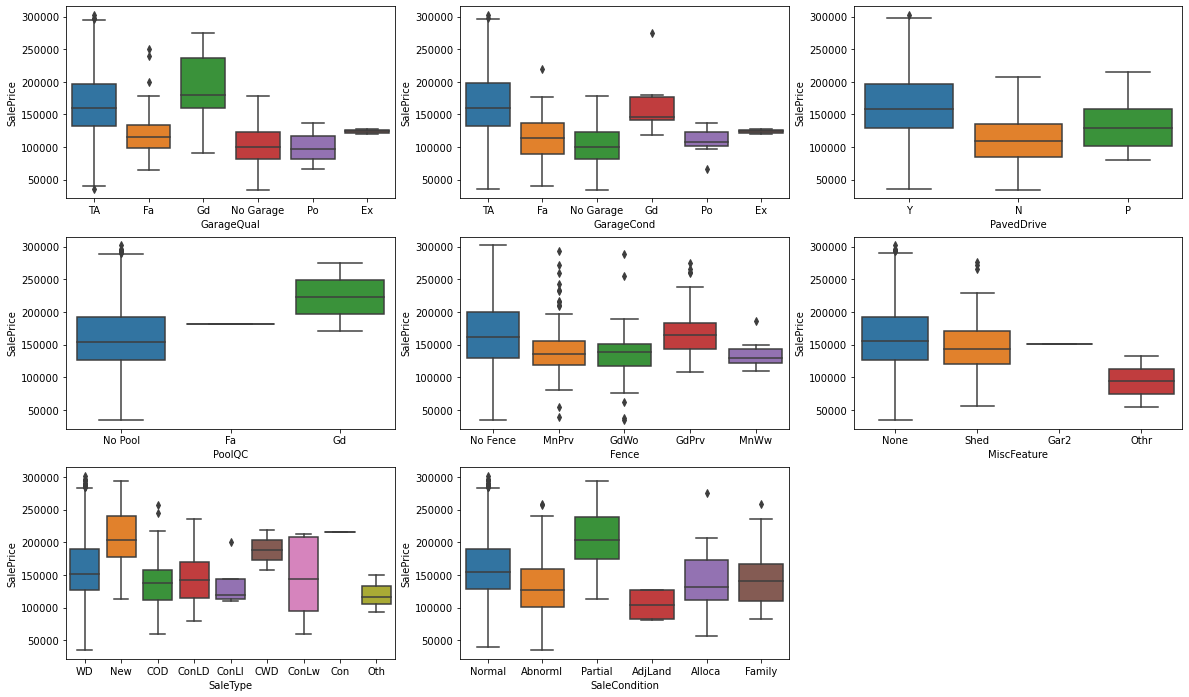

In [35]:
plot_box_graphs(27,35)
plot_box_graphs(36,44)
plot_box_graphs(45,52)

Looking at the above box_plots with categorical variables we can see which catgorical values contribute
significantly to the sale price of the model:

- Central Air Conditioning - If present fetches higher prices
- Sale Type - If it is new then people pay more
- Full Bath - Full Bathrooms above grade having 3 fetches higher prices
- KitchenQual - Excellent Quality gives higher prices
- TotRmsAbvGrd - 10-12 gives good price
- GarageCars - 3 car sizes gives good value to property
- PoolQC - Excellent Quality gives better prices
- SaleCondition - Partial homes fetch higher prices

In [36]:
def plot_bar_graphs(lower_index,upper_index):  
    plt.figure(figsize=(20, 12))
    k=1
    for i in range(lower_index,upper_index+1):
        plt.subplot(3,3,k)
        sns.countplot(x = variables["categorical"][i], data=df1)
        k=k+1
    plt.show()

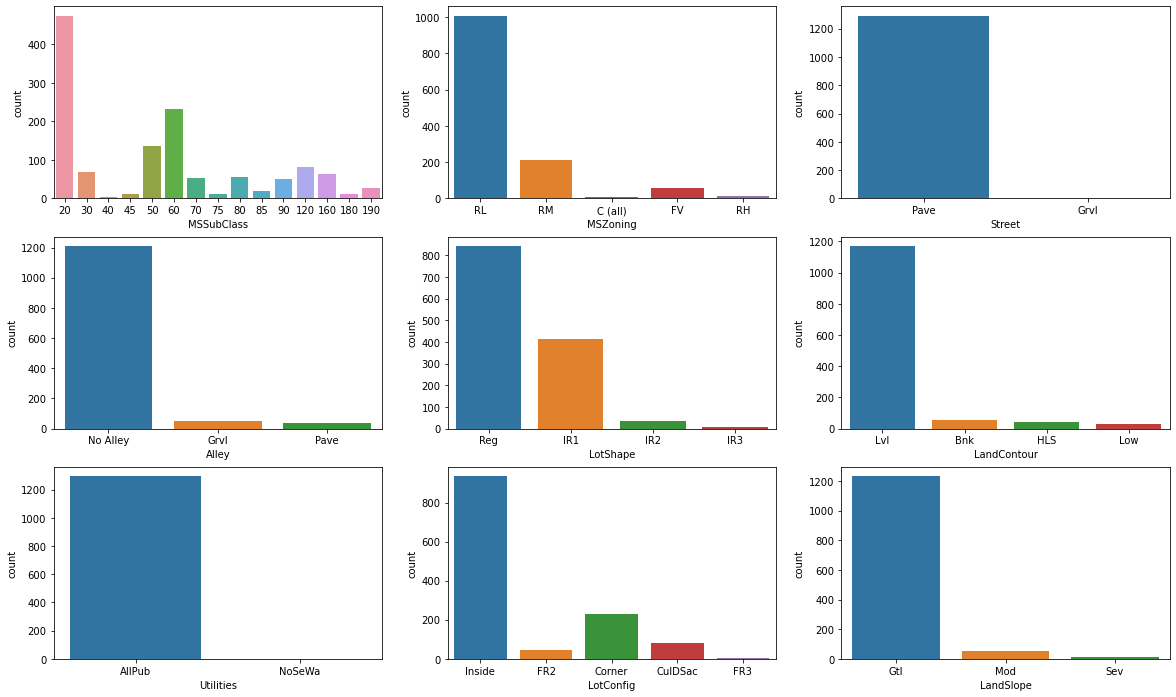

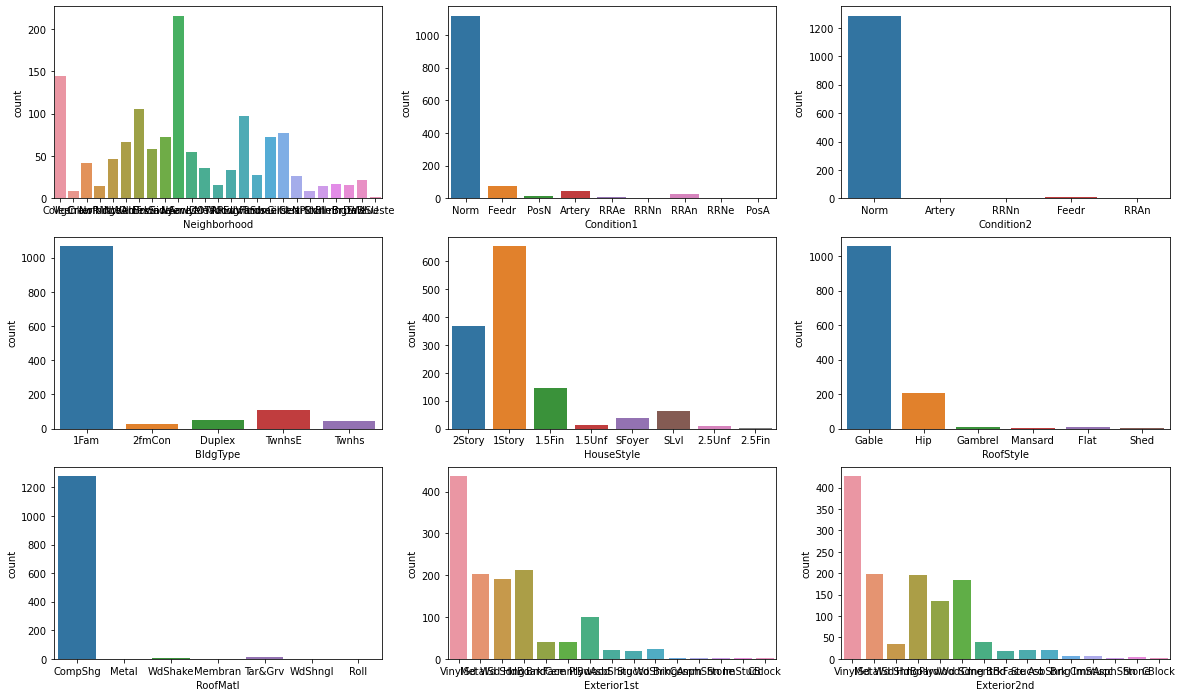

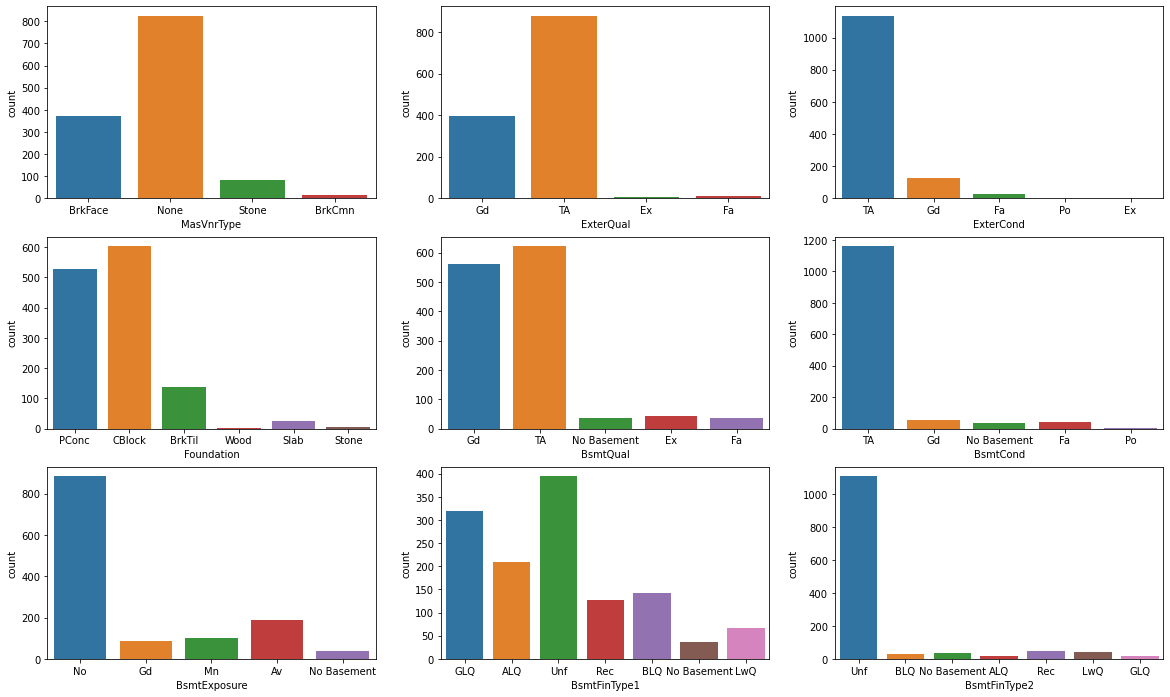

In [37]:
plot_bar_graphs(0,8)
plot_bar_graphs(9,17)
plot_bar_graphs(18,26)

Looking at the above count plot the heavily skewed data seems to be
 - Street
 - Utilities
 - Condition1
 - Condition2
 - RoofMatl
 - BsmtFinType2
 - BsmtCond
 - LandSlope
 - LandContour
 
 Lets check the percentage of values , if the number of the percentage of a single value is more than 90% in a column we can consider it to be deleted 

In [38]:
#Looking at the value counts to check if a column has many same values in it or not
for column in ["Street","Utilities","Condition1","Condition2","RoofMatl","BsmtFinType2","BsmtCond","LandSlope","LandContour"]:
    print((df1[column].value_counts()/df1.shape[0])*100)

Pave    99.691596
Grvl     0.308404
Name: Street, dtype: float64
AllPub    99.922899
NoSeWa     0.077101
Name: Utilities, dtype: float64
Norm      86.276022
Feedr      5.859676
Artery     3.315343
RRAn       1.850424
PosN       1.002313
RRAe       0.848111
PosA       0.385505
RRNn       0.308404
RRNe       0.154202
Name: Condition1, dtype: float64
Norm      99.151889
Feedr      0.462606
Artery     0.154202
RRNn       0.154202
RRAn       0.077101
Name: Condition2, dtype: float64
CompShg    98.612182
Tar&Grv     0.771010
WdShake     0.231303
WdShngl     0.154202
Metal       0.077101
Membran     0.077101
Roll        0.077101
Name: RoofMatl, dtype: float64
Unf            85.505012
Rec             3.777949
LwQ             3.238242
No Basement     2.852737
BLQ             2.390131
ALQ             1.156515
GLQ             1.079414
Name: BsmtFinType2, dtype: float64
TA             89.668466
Gd              4.163454
Fa              3.161141
No Basement     2.852737
Po              0.154202
Name

Looking at the above count plots and box plots to see the impact on Sale Price we can take away the
columns which have a single value for more than 90 % of data, but we also need to see that certain things like in RoofMatl WoodShingles are expensive hence will be smaller in number but contributes significantly to the price of the house. So we can drop these columns:
- Street
- Condition1
- Condition2
- Utilities
- LandSlope
- LandContour

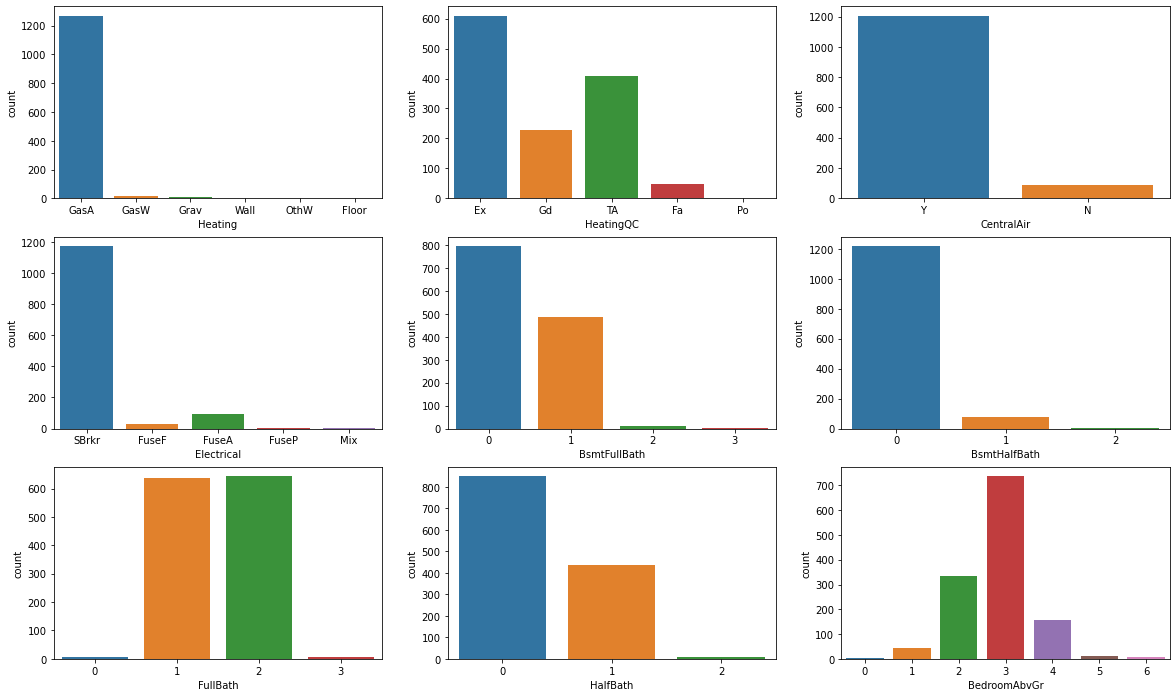

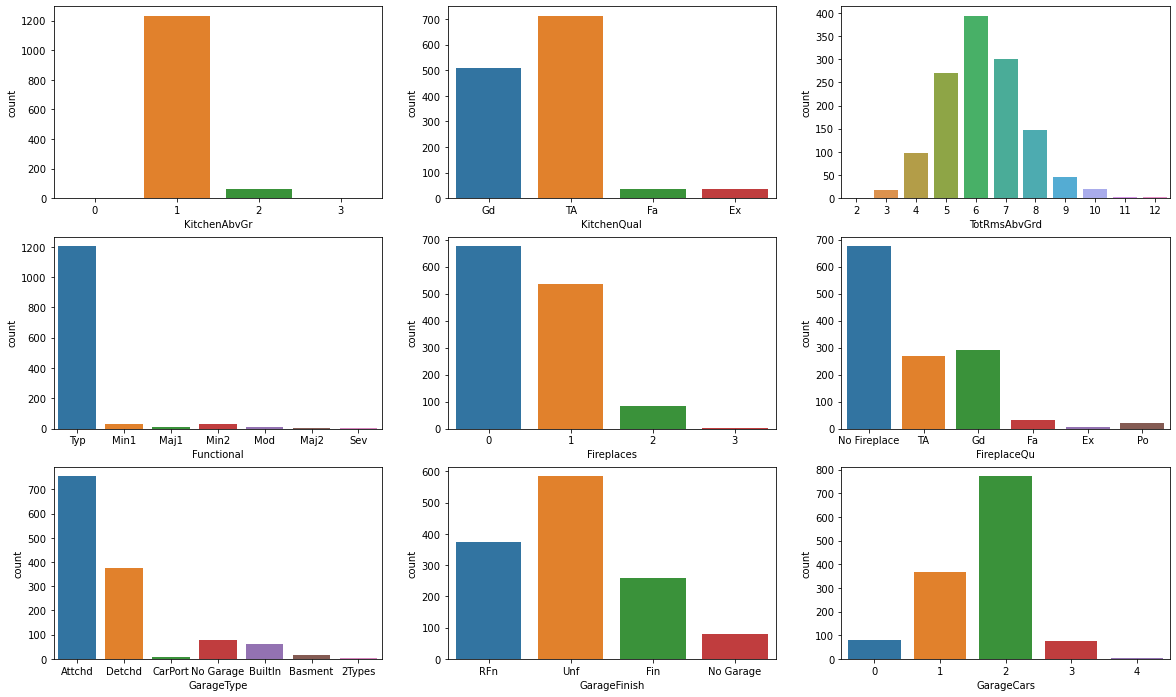

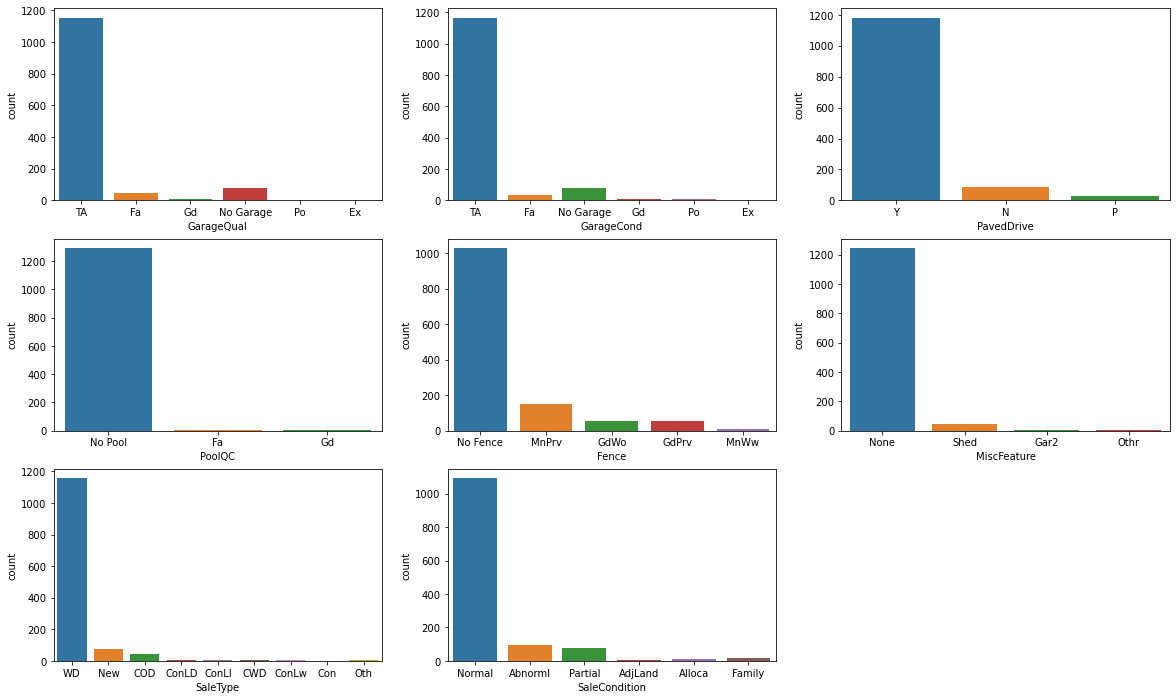

In [39]:
#Lets look at the rest and drop all together
plot_bar_graphs(27,35)
plot_bar_graphs(36,44)
plot_bar_graphs(45,52)

In [40]:
#Looking at the value counts to check if a column has many same values in it or not
for column in ["Heating","CentralAir","Electrical","BsmtHalfBath","Functional","GarageQual",
               "GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"]:
    print((df1[column].value_counts()/df1.shape[0])*100)

GasA     97.918273
GasW      1.002313
Grav      0.539707
Wall      0.308404
OthW      0.154202
Floor     0.077101
Name: Heating, dtype: float64
Y    92.983809
N     7.016191
Name: CentralAir, dtype: float64
SBrkr    90.593678
FuseA     7.016191
FuseF     2.081727
FuseP     0.231303
Mix       0.077101
Name: Electrical, dtype: float64
0    94.140324
1     5.705474
2     0.154202
Name: BsmtHalfBath, dtype: float64
Typ     93.060910
Min2     2.544333
Min1     2.235929
Mod      0.925212
Maj1     0.771010
Maj2     0.385505
Sev      0.077101
Name: Functional, dtype: float64
TA           89.051658
No Garage     6.090979
Fa            3.623747
Gd            0.848111
Po            0.231303
Ex            0.154202
Name: GarageQual, dtype: float64
TA           89.899769
No Garage     6.090979
Fa            2.698535
Gd            0.616808
Po            0.539707
Ex            0.154202
Name: GarageCond, dtype: float64
Y    91.133385
N     6.630686
P     2.235929
Name: PavedDrive, dtype: float64
No Poo

Looking at the above graphs (both count and box) we can see the heavily skewed data which does not significantly contribute to sale price are 
- Heating
- CentralAir
- Electrical
- BsmtHalfBath
- Functional
- GarageCond
- PavedDrive
- Fence
- MiscFeature
- SaleType

In [41]:
# So lets drop the above mentioned columns:
dropping_columns = ["Street","Utilities","Condition1","Condition2","RoofMatl","BsmtFinType2","LandSlope","LandContour",
                    "Heating","CentralAir","Electrical","BsmtHalfBath","Functional","GarageCond",
                    "PavedDrive","PoolQC","Fence","MiscFeature","SaleType"]
df2 = df1.drop(axis=1,columns=dropping_columns)
variables["categorical"] = list(filter(lambda x:x not in dropping_columns,variables["categorical"]))
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1297 non-null   int64  
 1   MSZoning       1297 non-null   object 
 2   LotFrontage    1297 non-null   float64
 3   LotArea        1297 non-null   int64  
 4   Alley          1297 non-null   object 
 5   LotShape       1297 non-null   object 
 6   LotConfig      1297 non-null   object 
 7   Neighborhood   1297 non-null   object 
 8   BldgType       1297 non-null   object 
 9   HouseStyle     1297 non-null   object 
 10  OverallQual    1297 non-null   int64  
 11  OverallCond    1297 non-null   int64  
 12  YearBuilt      1297 non-null   int64  
 13  YearRemodAdd   1297 non-null   int64  
 14  RoofStyle      1297 non-null   object 
 15  Exterior1st    1297 non-null   object 
 16  Exterior2nd    1297 non-null   object 
 17  MasVnrType     1297 non-null   object 
 18  MasVnrAr

###  2.4 Creating Derived Variables

We need to create derived variables if Possible. From the Dataset we can see that with date variables we can derive additional columns like 
- YearsInPossessionHouse -> YrSold - YearBuilt
- YearsInPossessionAfterRemodification - > YrSold - YearRemodAdd
- YearsInPossessionGarage -> YrSold - GarageYrBlt

In [42]:
df2["YearsInPossessionHouse"] = df2["YrSold"] - df2["YearBuilt"]
df2["YearsInPossessionAfterRemodification"] = df2["YrSold"] - df2["YearRemodAdd"]
df2["YearsInPossessionGarage"] = df2["YrSold"] - df2["GarageYrBlt"]

In [43]:
df2.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,YearsInPossessionHouse,YearsInPossessionAfterRemodification,YearsInPossessionGarage
0,60,RL,65.0,8450,No Alley,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003,RFn,2,548,TA,0,61,0,0,0,0,0,2,2008,Normal,208500,5,5,5
1,20,RL,80.0,9600,No Alley,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,TA,298,0,0,0,0,0,0,5,2007,Normal,181500,31,31,31
2,60,RL,68.0,11250,No Alley,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,TA,0,42,0,0,0,0,0,9,2008,Normal,223500,7,6,7
3,70,RL,60.0,9550,No Alley,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,TA,0,35,272,0,0,0,0,2,2006,Abnorml,140000,91,36,8
4,60,RL,84.0,14260,No Alley,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,TA,192,84,0,0,0,0,0,12,2008,Normal,250000,8,8,8
5,50,RL,85.0,14115,No Alley,IR1,Inside,Mitchel,1Fam,1.5Fin,5,5,1993,1995,Gable,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,0,64,796,Ex,796,566,0,1362,1,1,1,1,1,TA,5,0,No Fireplace,Attchd,1993,Unf,2,480,TA,40,30,0,320,0,0,700,10,2009,Normal,143000,16,14,16
7,60,RL,69.0,10382,No Alley,IR1,Corner,NWAmes,1Fam,2Story,7,6,1973,1973,Gable,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,32,216,1107,Ex,1107,983,0,2090,1,2,1,3,1,TA,7,2,TA,Attchd,1973,RFn,2,484,TA,235,204,228,0,0,0,350,11,2009,Normal,200000,36,36,36
8,50,RM,51.0,6120,No Alley,Reg,Inside,OldTown,1Fam,1.5Fin,7,5,1931,1950,Gable,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,0,952,952,Gd,1022,752,0,1774,0,2,0,2,2,TA,8,2,TA,Detchd,1931,Unf,2,468,Fa,90,0,205,0,0,0,0,4,2008,Abnorml,129900,77,58,77
9,190,RL,50.0,7420,No Alley,Reg,Corner,BrkSide,2fmCon,1.5Unf,5,6,1939,1950,Gable,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,0,140,991,Ex,1077,0,0,1077,1,1,0,2,2,TA,5,2,TA,Attchd,1939,RFn,1,205,Gd,0,4,0,0,0,0,0,1,2008,Normal,118000,69,58,69
10,20,RL,70.0,11200,No Alley,Reg,Inside,Sawyer,1Fam,1Story,5,5,1965,1965,Hip,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,0,134,1040,Ex,1040,0,0,1040,1,1,0,3,1,TA,5,0,No Fireplace,Detchd,1965,Unf,1,384,TA,0,0,0,0,0,0,0,2,2008,Normal,129500,43,43,43


In [44]:
variables["date"].extend(["YearsInPossessionHouse","YearsInPossessionAfterRemodification",
                                    "YearsInPossessionGarage"])
#Adding the other derived variables

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

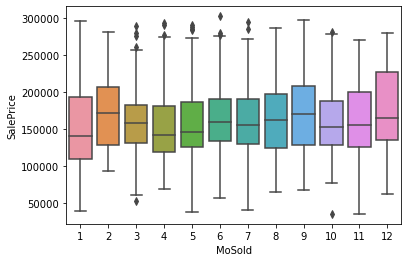

In [45]:
sns.boxplot(x="MoSold",y="SalePrice",data=df2)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

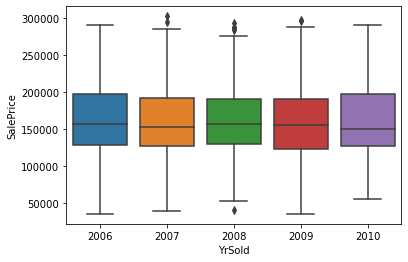

In [46]:
sns.boxplot(x="YrSold",y="SalePrice",data=df2)
#Seems property value doesnt seem to be appreciating much 
#These are the years of the finanical crisis

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

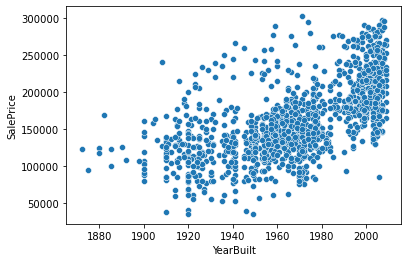

In [47]:
sns.scatterplot(x="YearBuilt",y="SalePrice",data=df2)

In [48]:
print(variables)

{'numerical': ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'], 'categorical': ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'SaleCondition'], 'date': ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold', 'YearsInPossessionHouse', 'YearsInPossessionAfterRemodification', 'YearsInPossessionGarage']}


### 2.5 Creating Dummy Variables

Here we need to create dummy variables for categorical columns and concatenate it with the main dataframe and drop the existing columns

**Splitting the dataset to X and y**

In [49]:
#First lets remove the target variable SalePrice from numerical variable
#variables["numerical"] = list(filter(lambda x:x!= "SalePrice",variables["numerical"]))
pricing_dataset = df2.loc[:,variables["numerical"] + variables["categorical"] + variables["date"]]
#y = df2["SalePrice"]

In [50]:
pricing_categorical = pricing_dataset[variables["categorical"]]
pricing_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,SaleCondition
0,60,RL,No Alley,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Ex,1,2,1,3,1,Gd,8,0,No Fireplace,Attchd,RFn,2,TA,Normal
1,20,RL,No Alley,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Ex,0,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,TA,Normal
2,60,RL,No Alley,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Ex,1,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,TA,Normal
3,70,RL,No Alley,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Gd,1,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,TA,Abnorml
4,60,RL,No Alley,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Ex,1,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,TA,Normal


Now before we create dummy variables we need to perform two tasks:
 - Ordinal Features so that we can convert it to integers since it represents a order like a quality.These variables we dont require to convert it into dummy variables
   - LotShape 
   - ExterQual
   - ExterCond
   - BsmtQual
   - BsmtCond
   - BsmtExposure
   - BsmtFinType1
   - HeatingQC
   - KitchenQual
   - FirePlaceQu
   - GarageFinish
   - GarageQual

In [51]:
#Lets define the mapping dictionaries
grade_lotshape = {"Reg":1,"IR1":2,"IR2":3,"IR3":4}
grade_1 = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
grade_bsmt = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"No Basement":0}
bsmt_exposure = {"Gd":4,"Av":3,"Mn":2,"No":1,"No Basement":0}
bsmt_type = {"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"No Basement":0}
grade_fireplace = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"No Fireplace":0}
grade_garage_finish = {"Fin":3,"RFn":2,"Unf":1,"No Garage":0}
grade_garage_qual = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"No Garage":0}

column_map_dicionary = {"LotShape":grade_lotshape,"ExterQual":grade_1,"ExterCond":grade_1,"BsmtQual":grade_bsmt,
                        "BsmtCond":grade_bsmt,"BsmtExposure":bsmt_exposure,"BsmtFinType1":bsmt_type,
                        "HeatingQC":grade_1,"KitchenQual":grade_1,"FireplaceQu":grade_fireplace,
                        "GarageFinish":grade_garage_finish,"GarageQual":grade_garage_qual}

In [52]:
#Lets map these columns to a particular value
for key,value in column_map_dicionary.items():
    pricing_categorical[key] = pricing_categorical[key].map(value)
    #print(key)
    #pricing_categorical[key] = pricing_categorical[key].astype("int64")
pricing_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,SaleCondition
0,60,RL,No Alley,1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,1,6,5,1,2,1,3,1,4,8,0,0,Attchd,2,2,3,Normal
1,20,RL,No Alley,1,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,3,3,CBlock,4,3,4,5,5,0,2,0,3,1,3,6,1,3,Attchd,2,2,3,Normal
2,60,RL,No Alley,2,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,2,6,5,1,2,1,3,1,4,6,1,3,Attchd,2,2,3,Normal
3,70,RL,No Alley,2,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,3,3,BrkTil,3,4,1,5,4,1,1,0,3,1,4,7,1,4,Detchd,1,3,3,Abnorml
4,60,RL,No Alley,2,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,3,6,5,1,2,1,4,1,4,9,1,3,Attchd,2,3,3,Normal


In [53]:
# Now nominal variables do not require to be converted to dummy variables they can be scaled separately
# Lets get the variables that requires dummy variables:
dummy_columns = ["MSSubClass","MSZoning","Alley","LotConfig","Neighborhood","BldgType","HouseStyle",
                 "RoofStyle","Exterior1st","Exterior2nd","MasVnrType","Foundation","GarageType","SaleCondition"]
nominal_columns = ["LotShape","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                   "HeatingQC","BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
                   "KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageFinish","GarageCars","GarageQual"]

In [54]:
pricing_dummies = pd.get_dummies(pricing_categorical, drop_first=True,columns=dummy_columns)
pricing_dummies.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4,3,4,3,1,6,5,1,2,1,3,1,4,8,0,0,2,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,3,3,4,3,4,5,5,0,2,0,3,1,3,6,1,3,2,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,2,4,3,4,3,2,6,5,1,2,1,3,1,4,6,1,3,2,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2,3,3,3,4,1,5,4,1,1,0,3,1,4,7,1,4,1,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,4,3,4,3,3,6,5,1,2,1,4,1,4,9,1,3,2,3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [55]:
# drop categorical variables 
pricing_dataset = pricing_dataset.drop(list(variables["categorical"]), axis=1)
# concat dummy variables with pricing_dataset
pricing_dataset = pd.concat([pricing_dataset, pricing_dummies], axis=1)
pricing_dataset.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold,YearsInPossessionHouse,YearsInPossessionAfterRemodification,YearsInPossessionGarage,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500,2003,2003,2003,2,2008,5,5,5,1,4,3,4,3,1,6,5,1,2,1,3,1,4,8,0,0,2,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500,1976,1976,1976,5,2007,31,31,31,1,3,3,4,3,4,5,5,0,2,0,3,1,3,6,1,3,2,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500,2001,2002,2001,9,2008,7,6,7,2,4,3,4,3,2,6,5,1,2,1,3,1,4,6,1,3,2,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000,1915,1970,1998,2,2006,91,36,8,2,3,3,3,4,1,5,4,1,1,0,3,1,4,7,1,4,1,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

### 2.6 Splitting the dataset

Here we need to split our dataset into train and test


In [56]:
# split into train and test
df_train, df_test = train_test_split(pricing_dataset, train_size=0.7,test_size = 0.3, random_state=100)
print("y_train Shape",df_train.shape)
print("y_test Shape",df_test.shape)
df_train.head()

y_train Shape (907, 161)
y_test Shape (390, 161)


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold,YearsInPossessionHouse,YearsInPossessionAfterRemodification,YearsInPossessionGarage,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
247,75.0,11310,6,5,0.0,0,0,1367,1367,1375,0,0,1375,451,0,30,0,0,0,0,0,140000,1954,1954,1954,6,2006,52,52,52,1,3,3,3,3,1,1,5,0,1,0,2,1,3,5,1,3,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1000,74.0,10206,3,3,0.0,0,0,0,0,944,0,0,944,528,0,0,0,0,0,0,0,82000,1952,1952,1956,7,2009,57,57,53,1,3,3,0,0,0,0,2,0,1,0,2,1,2,4,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
684,58.0,16770,7,5,30.0,0,0,1195,1195,1195,644,0,1839,486,0,81,0,0,0,0,0,221000,1998,1998,1998,6,2010,12,12,12,3,4,3,4,3,1,1,4,0,2,1,4,1,3,7,0,0,3,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
187,60.0,10410,5,7,0.0,0,0,660,660,808,704,144,1656,180,0,0,0,140,0,0,0,135000,1916,1987,1916,8,2009,93,22,93,1,3,3,2,3,1,1,5,0,2,1,3,1,3,8,0,0,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0

### 2.7 Scaling the numerical Features 

Here we rescale the numerical features so that we get processing faster


In [57]:
scaler = MinMaxScaler()
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold,YearsInPossessionHouse,YearsInPossessionAfterRemodification,YearsInPossessionGarage,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
247,75.0,11310,6,5,0.0,0,0,1367,1367,1375,0,0,1375,451,0,30,0,0,0,0,0,140000,1954,1954,1954,6,2006,52,52,52,1,3,3,3,3,1,1,5,0,1,0,2,1,3,5,1,3,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1000,74.0,10206,3,3,0.0,0,0,0,0,944,0,0,944,528,0,0,0,0,0,0,0,82000,1952,1952,1956,7,2009,57,57,53,1,3,3,0,0,0,0,2,0,1,0,2,1,2,4,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
684,58.0,16770,7,5,30.0,0,0,1195,1195,1195,644,0,1839,486,0,81,0,0,0,0,0,221000,1998,1998,1998,6,2010,12,12,12,3,4,3,4,3,1,1,4,0,2,1,4,1,3,7,0,0,3,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
187,60.0,10410,5,7,0.0,0,0,660,660,808,704,144,1656,180,0,0,0,140,0,0,0,135000,1916,1987,1916,8,2009,93,22,93,1,3,3,2,3,1,1,5,0,2,1,3,1,3,8,0,0,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0

In [58]:
#print(len(list(variables["date"])),len(list(variables["numerical"])),len(list(variables["categorical"])))
normalized_columns = list(df_train.columns)
print(normalized_columns)
print(len(normalized_columns))

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold', 'YearsInPossessionHouse', 'YearsInPossessionAfterRemodification', 'YearsInPossessionGarage', 'LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV',

In [59]:
#Lets also scale the target variable as it is quite large
cols = df_train.columns
df_train = pd.DataFrame(scale(df_train))
df_train.columns = cols
#df_train[normalized_columns] = scaler.fit_transform(df_train[normalized_columns])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold,YearsInPossessionHouse,YearsInPossessionAfterRemodification,YearsInPossessionGarage,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.410589,0.162811,0.135371,-0.508392,-0.555436,-0.978525,-0.294367,1.870554,1.048279,0.885430,-0.770712,-0.103712,-0.064973,0.095202,-0.720082,-0.179315,-0.380697,-0.100762,-0.273138,-0.046929,-0.088051,-0.400896,-0.496621,-1.385765,0.225649,-0.097168,-1.358544,0.434735,1.298464,-0.229281,-0.690167,-0.603556,-0.228482,-0.422780,0.153488,-0.508572,-1.115670,0.958764,-0.748257,-0.966786,-0.686959,-1.067999,-0.234538,-0.694962,-0.867461,0.783457,0.834160,-0.673485,0.511216,0.300595,-0.233776,-0.04701,-0.100111,-0.348048,-0.439797,-0.209113,-0.100111,-0.200344,-0.120588,-0.209113,-0.258957,-0.217587,-0.088192,-0.157667,-0.223089,-0.105585,0.550601,-0.446918,0.280139,-0.184953,-0.249120,-0.188117,-0.057607,0.630504,-0.04701,-0.088192,-0.214793,-0.138207,-0.350035,-0.175162,-0.286948,-0.256525,-0.175162,-0.120588,-0.206225,2.228700,-0.081604,-0.233776,-0.110801,-0.157667,-0.304583,-0.129677,-0.244089,-0.197348,-0.251607,-0.081604,-0.15016,-0.088192,-0.161301,-0.209113,-0.178478,-0.30024,-0.105585,0.953663,-0.057607,-0.094333,-0.610052,-0.157667,-0.209113,-2.144473,-0.094333,2.321061,-0.066556,-0.033223,-0.033223,-0.033223,-0.203302,-0.033223,-0.178478,-0.407197,-0.033223,-0.445141,-0.289192,0.0,-0.115792,-0.720599,2.380991,-0.134005,-0.033223,-0.066556,7.711463,-0.033223,-0.175162,-0.397951,-0.081604,-0.438010,-0.340031,-0.057607,-0.12521,-0.708277,-0.401661,-0.17179,-0.616861,0

In [60]:
#Splitting the dataset into X and Y
y_train = df_train.pop('SalePrice') # Putting price column to y or removing it from the df frame
X_train = df_train # The remaining
print("X_train Shape",X_train.shape)
print("y_train Shape",y_train.shape)

X_train Shape (907, 160)
y_train Shape (907,)


## 3 Data Modelling

Now in this Data Modelling , we shall do the following 
1. Build the model using RFE method for Linear Regression
2. Use Ridge
3. Use Lasso

Since number of features are high i.e., 160 we can use RFE to do the initial screening of our features and then give it Ridge and Lasso
- Now for Linear and Ridge Regression lets choose 20 features and then check the VIF and continue
- For Lasso to try feature elimination lets choose 30 features and then give it to lasso to select the features
  We shall also give it all features so that we can see how it responds

In [61]:
# Running RFE with many features
linear = LinearRegression()
linear.fit(X_train, y_train)
# Since the number of features is many lets keep it at 50 features and try 
rfe = RFE(linear, 20)             # running RFE
rfe.fit(X_train, y_train)
#Now for Linear and Ridge Regression lets choose 20 features and then check the VIF and continue
#For Lasso to try feature elimination lets choose 30 features and then give it to lasso to select the features
#And then elminate
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [62]:
included_columns = X_train.columns[rfe.support_]
excluded_columns = X_train.columns[~rfe.support_]
print("Included Columns:",list(included_columns))
print("Excluded Columns:",list(excluded_columns))

Included Columns: ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'YearBuilt', 'YearsInPossessionHouse', 'YearsInPossessionAfterRemodification', 'KitchenQual', 'MSSubClass_160', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'BldgType_Duplex', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone']
Excluded Columns: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold', 'YearsInPossessionGarage', 'LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', '

In [63]:
linear_columns = list(X_train.columns[rfe.support_])
# For Lasso we can pick 30 features and check
#After our final model we can copy it to ridge regression model
rfe = RFE(linear, 30)             # Checking with 30 and 20
rfe.fit(X_train, y_train)
#lasso_columns = list(X_train.columns[rfe.support_])
lasso_columns = linear_columns
print("Linear Model Columns",linear_columns)
print("Lasso Model Columns",lasso_columns)

Linear Model Columns ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'YearBuilt', 'YearsInPossessionHouse', 'YearsInPossessionAfterRemodification', 'KitchenQual', 'MSSubClass_160', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'BldgType_Duplex', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone']
Lasso Model Columns ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'YearBuilt', 'YearsInPossessionHouse', 'YearsInPossessionAfterRemodification', 'KitchenQual', 'MSSubClass_160', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'BldgType_Duplex', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone']


### Model 1 using RFE

We will use RFE method to build Linear Regression Model

In [64]:
import statsmodels.api as sm  
# Creating X_test dataframe with RFE selected variables
X_train_linear = X_train[linear_columns]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_linear)
linear = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     297.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                -360.45
No. Observations:                 907   AIC:                             762.9
Df Residuals:                     886   BIC:                             863.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 7.459e-17      0.012   6.17e-15      1.000      -0.024       0.024
LotArea                                  0.1097      0.013      8.365      0.000       0.084       0.135
OverallQual                              0.2072      0.020     10.407      0.000       0.168       0.246
OverallCond                              0.1007      0.015      6.878      0.000       0.072       0.129
BsmtFinSF1                               0.1133      0.014      8.295      0.000       0.086       0.140
TotalBsmtSF                              0.1143      0.020      5.658      0.000       0.075       0.154
1stFlrSF                                 0.1376      0.096      1.431      0.153      -0.051       0.326
2ndFlrSF                                 0.1849      0.117      1.579      0.115      -0.045       0.415
GrLivArea                                0.1937      0.117      1.651      0.099      -0.037       0.424
GarageArea                               0.0896      0.016      5.758      0.000       0.059       0.120
YearBuilt                                0.0616      0.273      0.226      0.821      -0.474       0.597
YearsInPossessionHouse                  -0.2561      0.273     -0.939      0.348      -0.791       0.279
YearsInPossessionAfterRemodification    -0.0310      0.018     -1.705      0.089      -0.067       0.005
KitchenQual                              0.0992      0.017      5.921      0.000       0.066       0.132
MSSubClass_160                          -0.0869      0.013     -6.574      0.000      -0.113      -0.061
Neighborhood_BrkSide                     0.0615      0.013      4.823      0.000       0.037       0.087
Neighborhood_Crawfor                     0.0967      0.013      7.523      0.000       0.071       0.122
BldgType_Duplex                         -0.0738      0.013     -5.627      0.000      -0.100      -0.048
MasVnrType_BrkFace                       0.1615      0.052      3.110      0.002       0.060       0.263
MasVnrType_None                          0.1803      0.055      3.302      0.001       0.073       0.287
MasVnrType_Stone                         0.1404      0.031      4.522      0.000       0.079       0.201
==============================================================================
Omnibus:                       71.590   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.157
Skew:                          -0.290   Prob(JB):                     1.95e-57
Kurtosis:                       5.564   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [65]:
r2_score(y_train, linear.predict(X_train_rfe))

0.8703670283457463

In [66]:
#Now lets check the VIF of the various columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,YearsInPossessionHouse,508.63
10,YearBuilt,508.27
8,GrLivArea,94.10
7,2ndFlrSF,93.77
6,1stFlrSF,63.19
19,MasVnrType_None,20.38
18,MasVnrType_BrkFace,18.42
20,MasVnrType_Stone,6.59
5,TotalBsmtSF,2.79
2,OverallQual,2.71


In [67]:
#Lets remove Garage Quality and then try as may be it is explained by garage type
linear_columns.remove("YearsInPossessionHouse")
X_train_linear = X_train[linear_columns]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_linear)
linear = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     313.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                -360.91
No. Observations:                 907   AIC:                             761.8
Df Residuals:                     887   BIC:                             858.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 7.459e-17      0.012   6.17e-15      1.000      -0.024       0.024
LotArea                                  0.1099      0.013      8.382      0.000       0.084       0.136
OverallQual                              0.2073      0.020     10.412      0.000       0.168       0.246
OverallCond                              0.0998      0.015      6.833      0.000       0.071       0.128
BsmtFinSF1                               0.1132      0.014      8.289      0.000       0.086       0.140
TotalBsmtSF                              0.1148      0.020      5.685      0.000       0.075       0.154
1stFlrSF                                 0.1364      0.096      1.418      0.156      -0.052       0.325
2ndFlrSF                                 0.1834      0.117      1.566      0.118      -0.046       0.413
GrLivArea                                0.1948      0.117      1.661      0.097      -0.035       0.425
GarageArea                               0.0899      0.016      5.774      0.000       0.059       0.120
YearBuilt                                0.3168      0.021     14.792      0.000       0.275       0.359
YearsInPossessionAfterRemodification    -0.0316      0.018     -1.739      0.082      -0.067       0.004
KitchenQual                              0.0996      0.017      5.946      0.000       0.067       0.132
MSSubClass_160                          -0.0867      0.013     -6.563      0.000      -0.113      -0.061
Neighborhood_BrkSide                     0.0619      0.013      4.855      0.000       0.037       0.087
Neighborhood_Crawfor                     0.0974      0.013      7.586      0.000       0.072       0.123
BldgType_Duplex                         -0.0737      0.013     -5.617      0.000      -0.099      -0.048
MasVnrType_BrkFace                       0.1599      0.052      3.081      0.002       0.058       0.262
MasVnrType_None                          0.1787      0.055      3.274      0.001       0.072       0.286
MasVnrType_Stone                         0.1387      0.031      4.474      0.000       0.078       0.199
==============================================================================
Omnibus:                       71.882   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.576
Skew:                          -0.290   Prob(JB):                     5.82e-58
Kurtosis:                       5.576   Cond. No.                         33.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,GrLivArea,94.09
7,2ndFlrSF,93.76
6,1stFlrSF,63.18
18,MasVnrType_None,20.36
17,MasVnrType_BrkFace,18.41
19,MasVnrType_Stone,6.57
10,YearBuilt,3.13
5,TotalBsmtSF,2.79
2,OverallQual,2.71
11,YearsInPossessionAfterRemodification,2.26


In [69]:
#Here the P-value of MSZoning_RH is also quite high plus we can see that EDA also it doesnt signify much
#So lets drop it and try again
linear_columns.remove("2ndFlrSF")
X_train_linear = X_train[linear_columns]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_linear)
linear = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     329.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                -362.16
No. Observations:                 907   AIC:                             762.3
Df Residuals:                     888   BIC:                             853.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 7.459e-17      0.012   6.16e-15      1.000      -0.024       0.024
LotArea                                  0.1108      0.013      8.455      0.000       0.085       0.137
OverallQual                              0.2084      0.020     10.467      0.000       0.169       0.248
OverallCond                              0.1008      0.015      6.903      0.000       0.072       0.129
BsmtFinSF1                               0.1136      0.014      8.311      0.000       0.087       0.140
TotalBsmtSF                              0.1130      0.020      5.604      0.000       0.073       0.153
1stFlrSF                                -0.0106      0.021     -0.509      0.611      -0.052       0.030
GrLivArea                                0.3768      0.016     23.220      0.000       0.345       0.409
GarageArea                               0.0920      0.016      5.934      0.000       0.062       0.122
YearBuilt                                0.3200      0.021     15.000      0.000       0.278       0.362
YearsInPossessionAfterRemodification    -0.0306      0.018     -1.681      0.093      -0.066       0.005
KitchenQual                              0.1000      0.017      5.970      0.000       0.067       0.133
MSSubClass_160                          -0.0867      0.013     -6.560      0.000      -0.113      -0.061
Neighborhood_BrkSide                     0.0633      0.013      4.972      0.000       0.038       0.088
Neighborhood_Crawfor                     0.0987      0.013      7.698      0.000       0.074       0.124
BldgType_Duplex                         -0.0728      0.013     -5.548      0.000      -0.099      -0.047
MasVnrType_BrkFace                       0.1590      0.052      3.063      0.002       0.057       0.261
MasVnrType_None                          0.1771      0.055      3.243      0.001       0.070       0.284
MasVnrType_Stone                         0.1377      0.031      4.441      0.000       0.077       0.199
==============================================================================
Omnibus:                       71.037   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.779
Skew:                          -0.285   Prob(JB):                     3.89e-57
Kurtosis:                       5.559   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#Here the P-value of RoofStyle_Shed is also quite high plus we can see that EDA also it doesnt signify much
#So lets drop it and try again
linear_columns.remove("YearsInPossessionAfterRemodification")
X_train_linear = X_train[linear_columns]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_linear)
linear = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     348.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                -363.60
No. Observations:                 907   AIC:                             763.2
Df Residuals:                     889   BIC:                             849.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.459e-17      0.012   6.16e-15      1.000      -0.024       0.024
LotArea                  0.1099      0.013      8.384      0.000       0.084       0.136
OverallQual              0.2090      0.020     10.488      0.000       0.170       0.248
OverallCond              0.1097      0.014      8.056      0.000       0.083       0.136
BsmtFinSF1               0.1118      0.014      8.198      0.000       0.085       0.139
TotalBsmtSF              0.1136      0.020      5.628      0.000       0.074       0.153
1stFlrSF                -0.0105      0.021     -0.503      0.615      -0.051       0.030
GrLivArea                0.3799      0.016     23.530      0.000       0.348       0.412
GarageArea               0.0910      0.016      5.865      0.000       0.061       0.121
YearBuilt                0.3364      0.019     17.729      0.000       0.299       0.374
KitchenQual              0.1091      0.016      6.871      0.000       0.078       0.140
MSSubClass_160          -0.0866      0.013     -6.544      0.000      -0.113      -0.061
Neighborhood_BrkSide     0.0632      0.013      4.956      0.000       0.038       0.088
Neighborhood_Crawfor     0.0981      0.013      7.646      0.000       0.073       0.123
BldgType_Duplex         -0.0741      0.013     -5.652      0.000      -0.100      -0.048
MasVnrType_BrkFace       0.1545      0.052      2.977      0.003       0.053       0.256
MasVnrType_None          0.1741      0.055      3.187      0.001       0.067       0.281
MasVnrType_Stone         0.1366      0.031      4.401      0.000       0.076       0.197
==============================================================================
Omnibus:                       69.486   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.180
Skew:                          -0.278   Prob(JB):                     2.86e-55
Kurtosis:                       5.518   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
linear_columns.remove("1stFlrSF")
X_train_linear = X_train[linear_columns]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_linear)
linear = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     370.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                -363.73
No. Observations:                 907   AIC:                             761.5
Df Residuals:                     890   BIC:                             843.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.459e-17      0.012   6.16e-15      1.000      -0.024       0.024
LotArea                  0.1095      0.013      8.372      0.000       0.084       0.135
OverallQual              0.2101      0.020     10.616      0.000       0.171       0.249
OverallCond              0.1098      0.014      8.067      0.000       0.083       0.137
BsmtFinSF1               0.1116      0.014      8.191      0.000       0.085       0.138
TotalBsmtSF              0.1071      0.015      6.914      0.000       0.077       0.138
GrLivArea                0.3775      0.015     24.444      0.000       0.347       0.408
GarageArea               0.0898      0.015      5.859      0.000       0.060       0.120
YearBuilt                0.3364      0.019     17.737      0.000       0.299       0.374
KitchenQual              0.1092      0.016      6.878      0.000       0.078       0.140
MSSubClass_160          -0.0852      0.013     -6.597      0.000      -0.110      -0.060
Neighborhood_BrkSide     0.0631      0.013      4.950      0.000       0.038       0.088
Neighborhood_Crawfor     0.0981      0.013      7.653      0.000       0.073       0.123
BldgType_Duplex         -0.0755      0.013     -5.907      0.000      -0.101      -0.050
MasVnrType_BrkFace       0.1558      0.052      3.005      0.003       0.054       0.258
MasVnrType_None          0.1760      0.054      3.231      0.001       0.069       0.283
MasVnrType_Stone         0.1369      0.031      4.414      0.000       0.076       0.198
==============================================================================
Omnibus:                       70.100   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.385
Skew:                          -0.281   Prob(JB):                     5.77e-56
Kurtosis:                       5.533   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Lets calculate again the VIF factors:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,MasVnrType_None,20.23
14,MasVnrType_BrkFace,18.31
16,MasVnrType_Stone,6.56
2,OverallQual,2.67
8,YearBuilt,2.45
9,KitchenQual,1.72
5,TotalBsmtSF,1.64
6,GrLivArea,1.63
7,GarageArea,1.60
4,BsmtFinSF1,1.27


In [73]:
linear_columns.remove("MasVnrType_None")
X_train_linear = X_train[linear_columns]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_linear)
linear = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     390.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:45   Log-Likelihood:                -369.02
No. Observations:                 907   AIC:                             770.0
Df Residuals:                     891   BIC:                             847.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.459e-17      0.012   6.13e-15      1.000      -0.024       0.024
LotArea                  0.1018      0.013      7.873      0.000       0.076       0.127
OverallQual              0.2139      0.020     10.765      0.000       0.175       0.253
OverallCond              0.1104      0.014      8.067      0.000       0.084       0.137
BsmtFinSF1               0.1128      0.014      8.235      0.000       0.086       0.140
TotalBsmtSF              0.1044      0.016      6.710      0.000       0.074       0.135
GrLivArea                0.3761      0.016     24.232      0.000       0.346       0.407
GarageArea               0.0890      0.015      5.777      0.000       0.059       0.119
YearBuilt                0.3360      0.019     17.623      0.000       0.299       0.373
KitchenQual              0.1102      0.016      6.908      0.000       0.079       0.142
MSSubClass_160          -0.0864      0.013     -6.663      0.000      -0.112      -0.061
Neighborhood_BrkSide     0.0621      0.013      4.848      0.000       0.037       0.087
Neighborhood_Crawfor     0.0985      0.013      7.645      0.000       0.073       0.124
BldgType_Duplex         -0.0740      0.013     -5.761      0.000      -0.099      -0.049
MasVnrType_BrkFace      -0.0058      0.014     -0.428      0.669      -0.033       0.021
MasVnrType_Stone         0.0465      0.013      3.460      0.001       0.020       0.073
==============================================================================
Omnibus:                       73.288   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.333
Skew:                          -0.298   Prob(JB):                     1.99e-59
Kurtosis:                       5.607   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
linear_columns.remove("MasVnrType_BrkFace")
X_train_linear = X_train[linear_columns]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_linear)
linear = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     418.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:45   Log-Likelihood:                -369.11
No. Observations:                 907   AIC:                             768.2
Df Residuals:                     892   BIC:                             840.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.459e-17      0.012   6.13e-15      1.000      -0.024       0.024
LotArea                  0.1022      0.013      7.934      0.000       0.077       0.127
OverallQual              0.2133      0.020     10.764      0.000       0.174       0.252
OverallCond              0.1103      0.014      8.066      0.000       0.083       0.137
BsmtFinSF1               0.1120      0.014      8.248      0.000       0.085       0.139
TotalBsmtSF              0.1038      0.015      6.701      0.000       0.073       0.134
GrLivArea                0.3754      0.015     24.330      0.000       0.345       0.406
GarageArea               0.0886      0.015      5.764      0.000       0.058       0.119
YearBuilt                0.3348      0.019     17.770      0.000       0.298       0.372
KitchenQual              0.1106      0.016      6.955      0.000       0.079       0.142
MSSubClass_160          -0.0868      0.013     -6.715      0.000      -0.112      -0.061
Neighborhood_BrkSide     0.0622      0.013      4.865      0.000       0.037       0.087
Neighborhood_Crawfor     0.0986      0.013      7.653      0.000       0.073       0.124
BldgType_Duplex         -0.0743      0.013     -5.799      0.000      -0.099      -0.049
MasVnrType_Stone         0.0481      0.013      3.741      0.000       0.023       0.073
==============================================================================
Omnibus:                       73.580   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.694
Skew:                          -0.297   Prob(JB):                     3.70e-60
Kurtosis:                       5.625   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Lets calculate again the VIF factors:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,OverallQual,2.65
8,YearBuilt,2.40
9,KitchenQual,1.71
5,TotalBsmtSF,1.62
6,GrLivArea,1.61
7,GarageArea,1.59
3,OverallCond,1.26
4,BsmtFinSF1,1.25
10,MSSubClass_160,1.13
1,LotArea,1.12


In [76]:
#So the columns chosen are 
print(linear_columns)
#Lets use the same columns in Ridge and see whether we can regularize the model and get good results
ridge_columns = linear_columns

['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'YearBuilt', 'KitchenQual', 'MSSubClass_160', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'BldgType_Duplex', 'MasVnrType_Stone']


In [77]:
rfe_columns = list(linear_columns)
rfe_columns.insert(0, "const")
feature_coefficients = pd.DataFrame({'Features':rfe_columns,'Coefficients_linear':list(linear.params)})
feature_coefficients

,Features,Coefficients_linear
0,const,7.459311e-17
1,LotArea,1.021973e-01
2,OverallQual,2.133411e-01
3,OverallCond,1.103017e-01
4,BsmtFinSF1,1.120461e-01
5,TotalBsmtSF,1.038015e-01
6,GrLivArea,3.753770e-01
7,GarageArea,8.858374e-02
8,YearBuilt,3.348015e-01
9,KitchenQual,1.106465e-01


### Model 2 using Ridge Linear Regression

Lets try using Ridge Linear Regression

In [78]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
X_train_ridge = X_train[ridge_columns]
# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train_ridge, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 0.3}


In [80]:
#Fitting Ridge model for alpha = 0.3 and printing coefficients which have been penalised
alpha = 0.3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_ridge, y_train)
ridge.coef_
#Here we can see that the coefficients are lower hence more regularized

array([ 0.10219303,  0.21342662,  0.1102037 ,  0.11202342,  0.10382799,
        0.37519157,  0.08864957,  0.3345412 ,  0.11071183, -0.08677647,
        0.06215738,  0.09854613, -0.07425754,  0.04811511])

In [81]:
r2_score(y_train, ridge.predict(X_train_ridge))

0.8678695988301555

In [82]:
feature_coefficients = pd.merge(feature_coefficients,
                                pd.DataFrame({'Features':ridge_columns,'Coefficients_ridge':list(ridge.coef_)}),
                                on='Features',how='left')
feature_coefficients

,Features,Coefficients_linear,Coefficients_ridge
0,const,7.459311e-17,NaN
1,LotArea,1.021973e-01,0.102193
2,OverallQual,2.133411e-01,0.213427
3,OverallCond,1.103017e-01,0.110204
4,BsmtFinSF1,1.120461e-01,0.112023
5,TotalBsmtSF,1.038015e-01,0.103828
6,GrLivArea,3.753770e-01,0.375192
7,GarageArea,8.858374e-02,0.088650
8,YearBuilt,3.348015e-01,0.334541
9,KitchenQual,1.106465e-01,0.110712


### Model 3 using Lasso

Lets use the lasso model and check how we are performing

In [83]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
X_train_lasso = X_train[lasso_columns] 
model_cv_lasso.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.0001}


In [85]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_lasso, y_train)
lasso.coef_

array([ 0.10213845,  0.21344468,  0.11017404,  0.11199124,  0.10380527,
        0.37526892,  0.08856199,  0.33457172,  0.11065836, -0.08672817,
        0.06206658,  0.09846837, -0.07420337,  0.04804117])

In [86]:
feature_coefficients = pd.merge(feature_coefficients,
                                pd.DataFrame({'Features':lasso_columns,'Coefficients_lasso':list(lasso.coef_)}),
                                on='Features',how='outer')
feature_coefficients

,Features,Coefficients_linear,Coefficients_ridge,Coefficients_lasso
0,const,7.459311e-17,NaN,NaN
1,LotArea,1.021973e-01,0.102193,0.102138
2,OverallQual,2.133411e-01,0.213427,0.213445
3,OverallCond,1.103017e-01,0.110204,0.110174
4,BsmtFinSF1,1.120461e-01,0.112023,0.111991
5,TotalBsmtSF,1.038015e-01,0.103828,0.103805
6,GrLivArea,3.753770e-01,0.375192,0.375269
7,GarageArea,8.858374e-02,0.088650,0.088562
8,YearBuilt,3.348015e-01,0.334541,0.334572
9,KitchenQual,1.106465e-01,0.110712,0.110658


In [87]:
r2_score(y_train, lasso.predict(X_train_lasso))

0.8678695451875202

- We can see that for lesser number of features for both lambdas are 0.0001
- But Lasso gives a better R_score among the three models.
- Now lets evaluate all the three models

## 4. Model Evaluation

Here lets evaluate the different Models created using simple Linear Regression,Ridge and then Lasso
1. Tranform the Test Set
1. Evaluate the different Models
2. Validate the assumptions of linear regression
3. Finalize the model

### 4.1 Transforming the Test Set

Here we transform the numerical variables which were earlier fit and transformed during the training phase

In [88]:
#Transforming Test Set
cols = df_test.columns
df_test = pd.DataFrame(scale(df_test))
df_test.columns = cols
#Reassigning columns as it converts to numpy array while scaling
#df_test = scaler.transform(df_test)
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold,YearsInPossessionHouse,YearsInPossessionAfterRemodification,YearsInPossessionGarage,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.355169,0.246177,-0.780673,-1.587994,-0.527039,-0.367426,-0.292049,-0.032894,-0.606744,0.216053,0.592571,-0.120182,0.759785,-0.930566,-0.719506,-0.743558,-0.359948,-0.142793,2.725560,-0.050702,-0.172658,-0.683782,-0.726492,1.189268,0.144842,-1.970486,0.873123,0.766149,-1.135381,-0.141991,-0.657185,-0.683252,-0.218803,-0.557331,0.092465,-0.607224,-0.803629,-0.098542,-0.834479,-0.941137,1.231746,0.279982,-0.164584,-0.715574,1.328573,0.632874,1.246259,-0.839891,-1.077246,0.236691,-0.238559,-0.071796,-0.088045,3.043544,-0.527910,-0.2,-0.071796,-0.238559,-0.135192,-0.170364,-0.256074,-0.238559,-0.088045,-0.125,-0.185695,-0.113961,0.5,-0.41797,0.232495,-0.153695,-0.283430,-0.185695,0.0,0.599070,0.0,-0.153695,-0.219971,-0.153695,-0.365679,-0.2,3.595632,-0.238559,-0.153695,-0.088045,-0.162221,-0.443079,-0.088045,-0.232495,-0.101797,-0.170364,-0.28343,-0.135192,-0.244505,-0.238559,-0.219971,-0.144715,-0.135192,-0.071796,-0.125,-0.170364,-0.2,-0.298974,-0.101797,-0.930607,0.0,-0.071796,-0.67873,-0.2,-0.261712,0.48795,-0.088045,-0.451335,-0.050702,0.0,0.0,-0.050702,-0.113961,0.0,-0.185695,-0.51996,0.0,-0.400892,-0.293855,-0.050702,-0.135192,-0.694903,2.442189,-0.144715,-0.071796,-0.088045,-0.101797,0.0,-0.185695,-0.471774,-0.050702,-0.396573,-0.342751,-0.050702,-0.125,-0.682763,2.368580,-0.153695,-0.674703,0.786293,-0.250340,1.025978,-0.829646,-0.088045,-0.050702,0.0,0.856349,-0.14

In [89]:
y_test = df_test.pop('SalePrice') # Putting price column to y or removing it from the df frame
X_test = df_test # The remaining
print("X_train Shape",X_test.shape)
print("y_train Shape",y_test.shape)

X_train Shape (390, 160)
y_train Shape (390,)


In [90]:
X_test_linear = X_test[linear_columns]
X_test_linear = sm.add_constant(X_test_linear)
X_test_ridge =  X_test[ridge_columns]
X_test_lasso =  X_test[lasso_columns]

### 4.2 Evaluate the different Models

Here we define the method, we evaluate the different models using r2_score , RSS and MSE across the train, test data


In [91]:
def calculate_metrics(model,model_dataframe_train,model_dataframe_test):
    # Lets calculate some metrics such as R2 score, RSS and RMSE
    y_pred_train = model.predict(model_dataframe_train)
    y_pred_test = model.predict(model_dataframe_test)

    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R-Score of Training Set:",r2_train_lr)
    metric.append(round(r2_train_lr, 4))

    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R-score of Testing Set",r2_test_lr)
    metric.append(round(r2_test_lr,4))

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print("Residual Sum of Squares Training Set:",rss1_lr)
    metric.append(round(rss1_lr,2))

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print("Residual Sum of Squares Testing Set",rss2_lr)
    metric.append(round(rss2_lr,2))

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("Mean Squared Error of Training Set",mse_train_lr)
    metric.append(round(mse_train_lr**0.5,2))

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("Mean Squared Error of Testing Set",mse_test_lr)
    metric.append(round(mse_test_lr**0.5,2))
    
    return metric

In [92]:
# Creating a table which contain all the metrics
print("Linear Regression Techniques")


linear_metric = calculate_metrics(linear,X_train_rfe,X_test_linear)

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': linear_metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
print("Ridge Regression Techniques")
rg_metric = pd.Series(calculate_metrics(ridge,X_train_ridge,X_test_ridge), name = 'Ridge Regression')
print("Lasso Regression Techniques")
ls_metric = pd.Series(calculate_metrics(lasso,X_train_lasso,X_test_lasso), name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Linear Regression Techniques
R-Score of Training Set: 0.8678696494602276
R-score of Testing Set 0.8825976971640715
Residual Sum of Squares Training Set: 119.84222793957355
Residual Sum of Squares Testing Set 45.78689810601211
Mean Squared Error of Training Set 0.13213035053977237
Mean Squared Error of Testing Set 0.1174023028359285
Ridge Regression Techniques
R-Score of Training Set: 0.8678695988301555
R-score of Testing Set 0.8826027068687012
Residual Sum of Squares Training Set: 119.84227386104894
Residual Sum of Squares Testing Set 45.78494432120654
Mean Squared Error of Training Set 0.13213040116984448
Mean Squared Error of Testing Set 0.11739729313129882
Lasso Regression Techniques
R-Score of Training Set: 0.8678695451875202
R-score of Testing Set 0.8826044172380805
Residual Sum of Squares Training Set: 119.84232251491909
Residual Sum of Squares Testing Set 45.78427727714865
Mean Squared Error of Training Set 0.1321304548124797
Mean Squared Error of Testing Set 0.11739558276191961

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.8679,0.8679,0.8679
1,R2 Score (Test),0.8826,0.8826,0.8826
2,RSS (Train),119.8400,119.8400,119.8400
3,RSS (Test),45.7900,45.7800,45.7800
4,MSE (Train),0.3600,0.3600,0.3600
5,MSE (Test),0.3400,0.3400,0.3400


So we can see that Lasso gives better R_Score of 8.7 in Training Set and 8.6 in Testing Set
Now lets validate the Assumptions of Linear Regression in the Test Set in different models

### 4.3 Validate Assumptions of Linear Regression

- Here we can valdate by plotting the errors terms whether it is a normal distribution or not 
- We can also check whether regularization has been done or not

Text(0.5, 0, 'Errors')

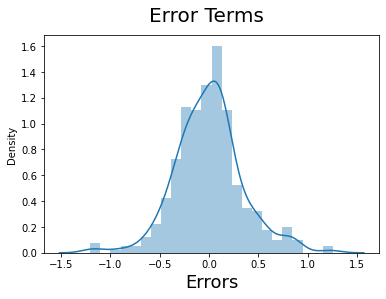

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_test - linear.predict(X_test_linear))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

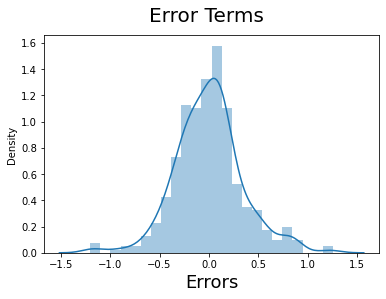

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_test - ridge.predict(X_test_ridge))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

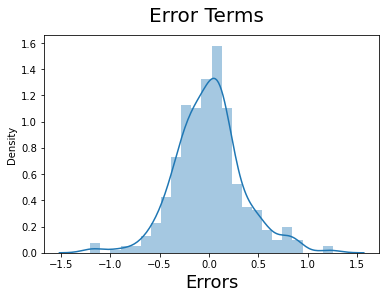

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_test - lasso.predict(X_test_lasso))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

We can see that lasso has made the distribution of the error terms more constrained as it as become more regularized 

We can now finalize the lasso model which is giving us good accuracy with lesser number of variables

### Subjective Questions

**Changes in Alpha for Ridge and Lasso**

In [96]:
#alpha = 0.6
ridge = Ridge(alpha=0.3)
ridge.fit(X_train_ridge, y_train)
coefficient_sum_3 = sum(list(ridge.coef_))
feature_coefficient_change_ridge = pd.DataFrame({'Features':ridge_columns,'Coefficients_ridge_0.3':list(ridge.coef_)})
ridge = Ridge(alpha=0.6)
ridge.fit(X_train_ridge, y_train)
coefficient_sum_6 = sum(list(ridge.coef_))
feature_coefficient_change_ridge = pd.merge(feature_coefficient_change_ridge,
                                pd.DataFrame({'Features':ridge_columns,'Coefficients_ridge_0.6':list(ridge.coef_)}),
                                on='Features',how='inner')
feature_coefficient_change_ridge

,Features,Coefficients_ridge_0.3,Coefficients_ridge_0.6
0,LotArea,0.102193,0.102189
1,OverallQual,0.213427,0.213512
2,OverallCond,0.110204,0.110106
3,BsmtFinSF1,0.112023,0.112001
4,TotalBsmtSF,0.103828,0.103854
5,GrLivArea,0.375192,0.375007
6,GarageArea,0.088650,0.088715
7,YearBuilt,0.334541,0.334282
8,KitchenQual,0.110712,0.110777
9,MSSubClass_160,-0.086776,-0.086727


In [97]:
print("Difference in ridge coefficients",(coefficient_sum_3- coefficient_sum_6) )

Difference in ridge coefficients 0.00034611358052538677


In [98]:
feature_coefficient_change_ridge.sort_values(by = "Coefficients_ridge_0.3", ascending = False)

,Features,Coefficients_ridge_0.3,Coefficients_ridge_0.6
5,GrLivArea,0.375192,0.375007
7,YearBuilt,0.334541,0.334282
1,OverallQual,0.213427,0.213512
3,BsmtFinSF1,0.112023,0.112001
8,KitchenQual,0.110712,0.110777
2,OverallCond,0.110204,0.110106
4,TotalBsmtSF,0.103828,0.103854
0,LotArea,0.102193,0.102189
11,Neighborhood_Crawfor,0.098546,0.098502
6,GarageArea,0.088650,0.088715


In [99]:
feature_coefficient_change_ridge.sort_values(by = "Coefficients_ridge_0.6", ascending = False)

,Features,Coefficients_ridge_0.3,Coefficients_ridge_0.6
5,GrLivArea,0.375192,0.375007
7,YearBuilt,0.334541,0.334282
1,OverallQual,0.213427,0.213512
3,BsmtFinSF1,0.112023,0.112001
8,KitchenQual,0.110712,0.110777
2,OverallCond,0.110204,0.110106
4,TotalBsmtSF,0.103828,0.103854
0,LotArea,0.102193,0.102189
11,Neighborhood_Crawfor,0.098546,0.098502
6,GarageArea,0.088650,0.088715


In [100]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_lasso, y_train)
lasso.coef_
coefficient_sum_1 = sum(list(lasso.coef_))
feature_coefficient_change_lasso = pd.DataFrame({'Features':lasso_columns,'Coefficients_lasso_1':list(lasso.coef_)})
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train_lasso, y_train)
lasso.coef_
coefficient_sum_2 = sum(list(lasso.coef_))
feature_coefficient_change_lasso = pd.merge(feature_coefficient_change_lasso,
                                pd.DataFrame({'Features':lasso_columns,'Coefficients_lasso_2':list(lasso.coef_)}),
                                on='Features',how='inner')
feature_coefficient_change_lasso

,Features,Coefficients_lasso_1,Coefficients_lasso_2
0,LotArea,0.102138,0.102080
1,OverallQual,0.213445,0.213550
2,OverallCond,0.110174,0.110047
3,BsmtFinSF1,0.111991,0.111935
4,TotalBsmtSF,0.103805,0.103809
5,GrLivArea,0.375269,0.375157
6,GarageArea,0.088562,0.088543
7,YearBuilt,0.334572,0.334343
8,KitchenQual,0.110658,0.110669
9,MSSubClass_160,-0.086728,-0.086630


In [101]:
print("Difference in lasso coefficients",(coefficient_sum_1- coefficient_sum_2) )

Difference in lasso coefficients 0.0006387080563243774


In [102]:
feature_coefficient_change_lasso.sort_values(by = "Coefficients_lasso_1", ascending = False)

,Features,Coefficients_lasso_1,Coefficients_lasso_2
5,GrLivArea,0.375269,0.375157
7,YearBuilt,0.334572,0.334343
1,OverallQual,0.213445,0.213550
3,BsmtFinSF1,0.111991,0.111935
8,KitchenQual,0.110658,0.110669
2,OverallCond,0.110174,0.110047
4,TotalBsmtSF,0.103805,0.103809
0,LotArea,0.102138,0.102080
11,Neighborhood_Crawfor,0.098468,0.098347
6,GarageArea,0.088562,0.088543


In [103]:
feature_coefficient_change_lasso.sort_values(by = "Coefficients_lasso_2", ascending = False)

,Features,Coefficients_lasso_1,Coefficients_lasso_2
5,GrLivArea,0.375269,0.375157
7,YearBuilt,0.334572,0.334343
1,OverallQual,0.213445,0.213550
3,BsmtFinSF1,0.111991,0.111935
8,KitchenQual,0.110658,0.110669
2,OverallCond,0.110174,0.110047
4,TotalBsmtSF,0.103805,0.103809
0,LotArea,0.102138,0.102080
11,Neighborhood_Crawfor,0.098468,0.098347
6,GarageArea,0.088562,0.088543
